##Task 1

In [ ]:
#importing necessary packages for Task 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import networkx as nx

In [ ]:
#Uploading Keyword data file
from google.colab import files
import pandas as pd
uploaded=files.upload()

In [ ]:
df=pd.read_csv('Keyword_data - Keyword_data.csv')
df

In [ ]:
#Creating a list of all keywords
keywords = []
for i in range(1, len(df.columns)):
  for j in range(1,len(df)):
    if (pd.isna(df.iloc[j,i])):
      continue
    keywords.append(df.iloc[j,i])

keywords

In [ ]:
#removing duplicates
keywords_unique = []
for keyword in keywords:
  if keyword not in keywords_unique:
    keywords_unique.append(keyword)

print("Number of unique keywords: ", len(keywords_unique))
print("Unique Keywords: ", keywords_unique)

Number of unique keywords:  248
Unique Keywords:  ['EQUITY', 'DIVERSIFICATION in industry', 'INTERORGANIZATIONAL relations', 'EXECUTIVE compensation', 'KNOWLEDGE management', 'EMOTIONS (Psychology)', 'SUPERVISORS', 'INDUSTRIAL relations', 'DECISION making', 'CORPORATE governance', 'EXECUTIVES', 'FAMILY-owned business enterprises', 'INSTITUTIONAL investors', 'RESEARCH & development', 'PROPERTY', 'STOCK options', 'MANAGEMENT science', 'AGGRESSION (Psychology)', 'CHIEF executive officers', 'MENTAL fatigue', 'PERSONNEL management', 'PRODUCT management', 'SOCIAL capital (Sociology)', 'ORGANIZATIONAL behavior', 'NEW products', 'LEADERSHIP', 'TEAMS in the workplace', 'LABOR supply', 'EMPLOYEES -- Attitudes', 'WORK & family', 'HUMAN capital', 'SOCIAL status', 'EMPLOYEE motivation', 'ORGANIZATIONAL change', 'CREATIVE ability', 'GOING public (Securities)', 'INTERNATIONAL business enterprises -- Management', 'COMPENSATION management', 'CROSS-functional teams', 'SERVICE industries -- Management', 

In [ ]:
# creating a zero filled dataframe with row and column names as the unique keywords
adj_df = pd.DataFrame(0, index=keywords_unique, columns=keywords_unique)
adj_df

In [ ]:
# creating the adjacency matrix
for col in adj_df.columns:
  for row in adj_df.index:
    count=0
    for i in range(len(df)):
      if row!=col:
        if (row in list(df.iloc[i,1:])) & (col in list(df.iloc[i,1:])):
          count+=1
    adj_df[col][row]=count
adj_df

EQUITY  DIVERSIFICATION in industry  \
EQUITY                              0                            0   
DIVERSIFICATION in industry         0                            0   
INTERORGANIZATIONAL relations       0                            0   
EXECUTIVE compensation              0                            0   
KNOWLEDGE management                0                            0   
...                               ...                          ...   
TRANSACTION costs                   0                            0   
INNOVATION adoption                 0                            1   
WORK attitudes                      0                            0   
HOST countries (Business)           0                            0   
MARKETING strategy                  0                            0   

                               INTERORGANIZATIONAL relations  \
EQUITY                                                     0   
DIVERSIFICATION in industry                                0   
INTERORGANIZATIONAL relations                              0   
EXECUTIVE compensation                                     0   
KNOWLEDGE management                                       1   
...                                                      ...   
TRANSACTION costs                                          0   
INNOVATION adoption                                        0   
WORK attitudes                                             0   
HOST countries (Business)                                  0   
MARKETING strategy                                         0   

                               EXECUTIVE compensation  KNOWLEDGE management  \
EQUITY                                              0                     0   
DIVERSIFICATION in industry                         0                     0   
INTERORGANIZATIONAL relations                       0                     1   
EXECUTIVE compensation                              0                     0   
KNOWLEDGE management                                0                     0   
...                                               ...                   ...   
TRANSACTION costs                                   0                     1   
INNOVATION adoption                                 0                     0   
WORK attitudes                                      0                     0   
HOST countries (Business)                           0                     0   
MARKETING strategy                                  0                     0   

                               EMOTIONS (Psychology)  SUPERVISORS  \
EQUITY                                             0            0   
DIVERSIFICATION in industry                        0            0   
INTERORGANIZATIONAL relations                      0            0   
EXECUTIVE compensation                             0            0   
KNOWLEDGE management                               0            0   
...                                              ...          ...   
TRANSACTION costs                                  0            0   
INNOVATION adoption                                0            0   
WORK attitudes                                     0            0   
HOST countries (Business)                          0            0   
MARKETING strategy                                 0            0   

                               INDUSTRIAL relations  DECISION making  \
EQUITY                                            0                0   
DIVERSIFICATION in industry                       0                0   
INTERORGANIZATIONAL relations                     0                0   
EXECUTIVE compensation                            0                2   
KNOWLEDGE management                              0                1   
...                                             ...              ...   
TRANSACTION costs                                 0                1   
INNOVATION adoption                               0                

{('EQUITY',
  'CORPORATE governance'): Text(0.015640062178817034, 0.18402805506229347, '1'),
 ('EQUITY',
  'ORGANIZATIONAL behavior'): Text(-0.0564363129621645, 0.13612957086807473, '1'),
 ('EQUITY',
  'ORGANIZATIONAL sociology'): Text(-0.10668262861178368, 0.16198071090899857, '1'),
 ('EQUITY',
  'PERFORMANCE'): Text(-0.044224032537559126, 0.23647878208190226, '1'),
 ('EQUITY',
  'META-analysis'): Text(-0.07225402530071359, 0.30741045264308997, '1'),
 ('EQUITY',
  'AGENCY theory'): Text(-0.05645840568977949, 0.19677164708577272, '1'),
 ('EQUITY',
  'ORGANIZATIONAL effectiveness'): Text(-0.020813271153779383, 0.18143157167596577, '1'),
 ('EQUITY',
  'PSYCHOMETRICS'): Text(-0.10027001056045479, 0.3018479606594221, '1'),
 ('EQUITY',
  'ORGANIZATIONAL research'): Text(-0.10792348374292848, 0.1966913377803941, '1'),
 ('EQUITY',
  'FINANCIAL performance'): Text(-0.0867587071988554, 0.23948931741852453, '1'),
 ('DIVERSIFICATION in industry',
  'INSTITUTIONAL investors'): Text(0.3128632310129

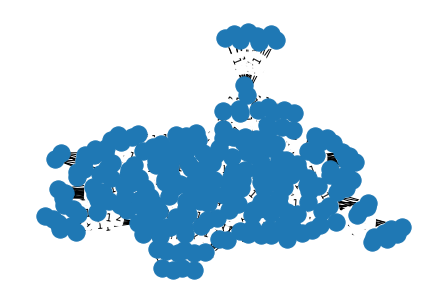

In [ ]:
#Converting adjacency matrix to Weighted graph
import networkx as nx
G = nx.from_pandas_adjacency(adj_df)
pos=nx.spring_layout(G)

nx.draw(G,pos)
labels=nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

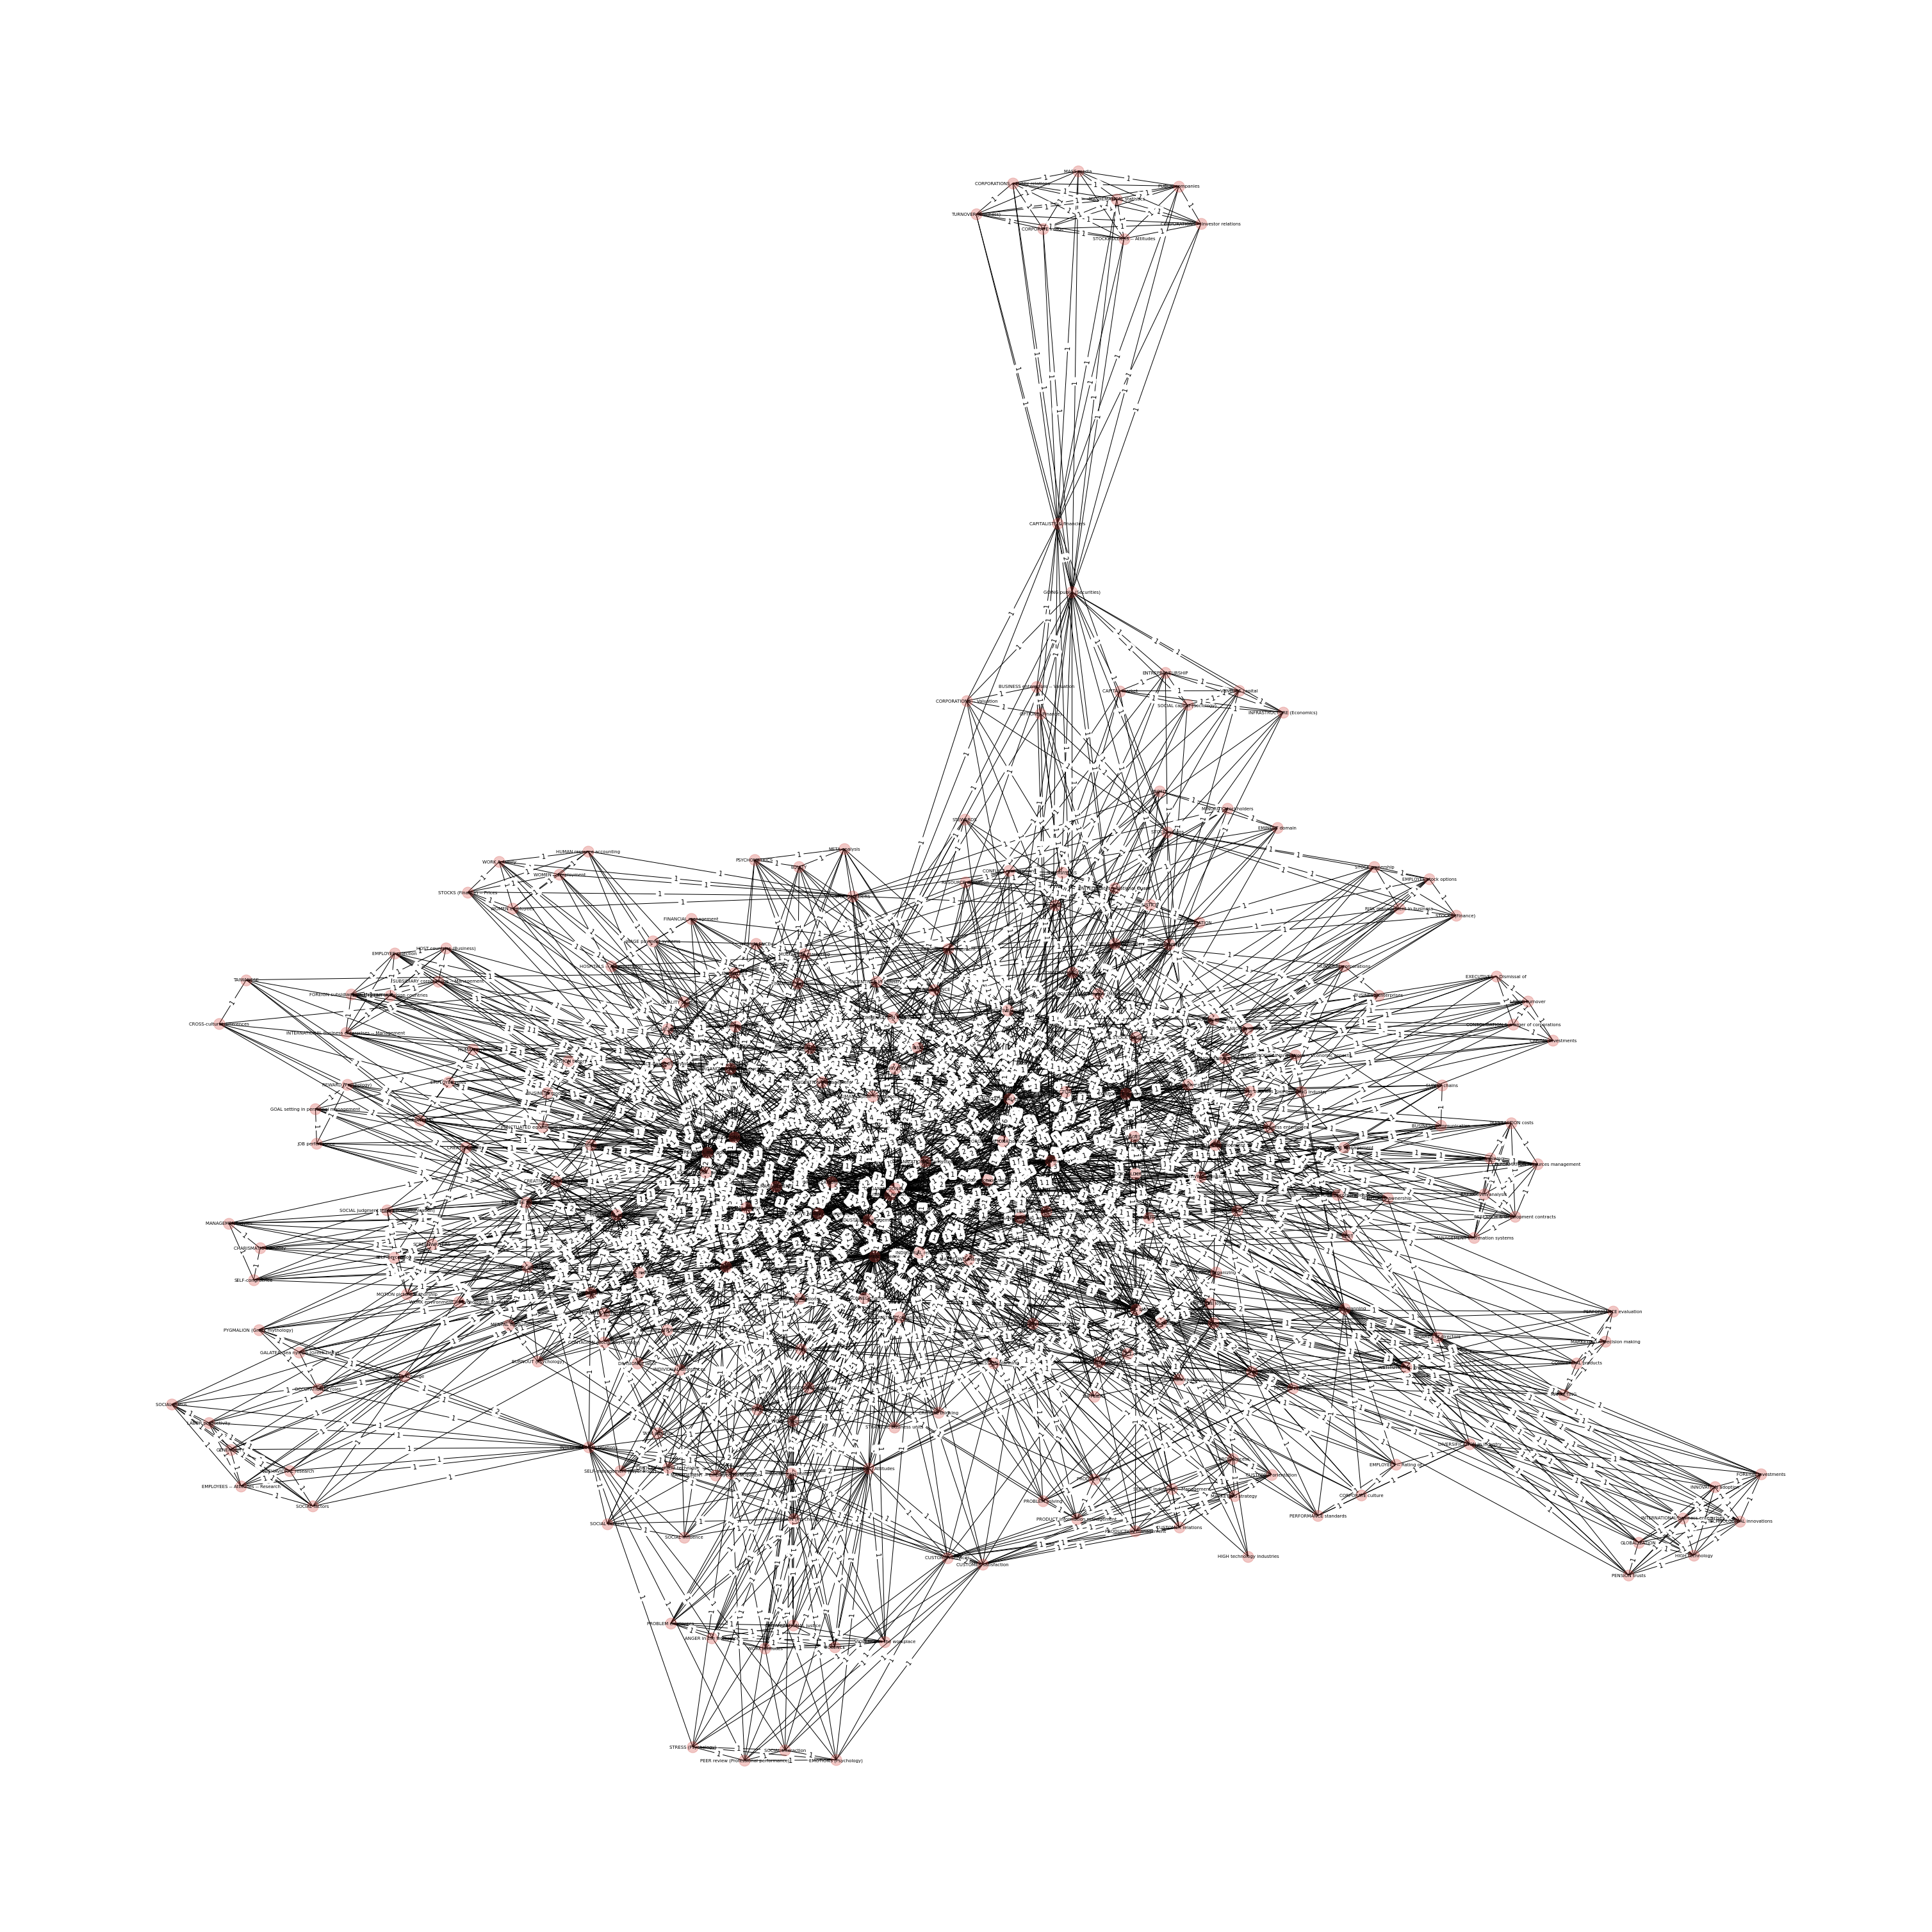

In [ ]:
#Plotting the Graph

plt.figure(figsize=(42,42))

edges = [(u,v) for u,v in G.edges]
edge_labels = nx.get_edge_attributes(G, "weight")
for k,v in edge_labels.items():
  edge_labels[k]=int(v)
nx.draw_networkx_edges(G, pos, edges)
nx.draw_networkx_edge_labels(G, pos, edge_labels)

nx.draw_networkx_nodes(G, alpha=0.3, pos=pos, node_color='#d14740')
nx.draw_networkx_labels(G, pos, font_size=7, font_family="sans-serif")

ax=plt.gca()
plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
#computing node degree and strength

degree=[]
for k,v in G.degree:
  degree.append(v)
strength=[]
for k,v in G.degree(weight='weight'):
  strength.append(v)

node_degree_strength = pd.DataFrame(columns=['Keyword','Degree','Strength'])
node_degree_strength['Keyword'] = keywords_unique
node_degree_strength['Degree'] = degree
node_degree_strength['Strength'] = strength

node_degree_strength

Keyword  Degree  Strength
0                           EQUITY      10        10
1      DIVERSIFICATION in industry      18        20
2    INTERORGANIZATIONAL relations      24        27
3           EXECUTIVE compensation      31        36
4             KNOWLEDGE management      19        20
..                             ...     ...       ...
243              TRANSACTION costs      11        11
244            INNOVATION adoption      11        11
245                 WORK attitudes      11        11
246      HOST countries (Business)      11        11
247             MARKETING strategy      11        11

[248 rows x 3 columns]

In [ ]:
# top 10 nodes by degree
node_degree_strength.drop('Strength',axis=1).sort_values(by='Degree',ascending=False).iloc[0:10,:2]

Keyword  Degree
23        ORGANIZATIONAL behavior     166
112  ORGANIZATIONAL effectiveness     104
16             MANAGEMENT science     102
20           PERSONNEL management      93
8                 DECISION making      90
156      ORGANIZATIONAL structure      74
40       ORGANIZATIONAL sociology      66
88             STRATEGIC planning      66
47          INDUSTRIAL management      64
9            CORPORATE governance      62

In [ ]:
# top 10 nodes by strength
node_degree_strength.drop('Degree',axis=1).sort_values(by='Strength',ascending=False).iloc[0:10,:]

Keyword  Strength
23        ORGANIZATIONAL behavior       265
112  ORGANIZATIONAL effectiveness       144
16             MANAGEMENT science       136
20           PERSONNEL management       126
8                 DECISION making       112
156      ORGANIZATIONAL structure       107
40       ORGANIZATIONAL sociology        96
9            CORPORATE governance        85
47          INDUSTRIAL management        84
88             STRATEGIC planning        80

In [ ]:
#top 10 node pairs by weight

top_10_weights = dict(adj_df.max().nlargest(10))

#creating a dataframe for keyword pair and weight
keyword_pair_weight=pd.DataFrame(columns=['Keyword1','Keyword2','Weight'])

keyword1_list=[]
keyword2_list = []
weight_list=[]

#appending the keywords and weight from adjacency matrix to keyword_pair_weight dict
for key,value in top_10_weights.items():
  keyword1_list.append(key)
  keyword2_list.append(adj_df[adj_df[key].where(adj_df[key]==value).notnull()].index[0])
  weight_list.append(value)

keyword_pair_weight['Keyword1'] = keyword1_list
keyword_pair_weight['Keyword2'] = keyword2_list
keyword_pair_weight['Weight'] = weight_list

keyword_pair_weight

Keyword1                      Keyword2  Weight
0       ORGANIZATIONAL behavior  ORGANIZATIONAL effectiveness      11
1  ORGANIZATIONAL effectiveness       ORGANIZATIONAL behavior      11
2      ORGANIZATIONAL structure       ORGANIZATIONAL behavior       9
3          PERSONNEL management       ORGANIZATIONAL behavior       8
4            MANAGEMENT science       ORGANIZATIONAL behavior       7
5               DECISION making       ORGANIZATIONAL behavior       6
6          CORPORATE governance       ORGANIZATIONAL behavior       6
7      ORGANIZATIONAL sociology       ORGANIZATIONAL behavior       6
8          INDUSTRIAL relations       ORGANIZATIONAL behavior       5
9        TEAMS in the workplace      ORGANIZATIONAL sociology       5

Text(0, 0.5, 'Average Strength')

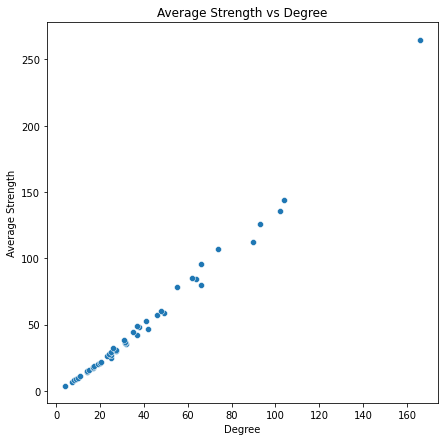

In [ ]:
# Average Strength vs Degree.

plt.figure(figsize=(7,7))
avg_strength = node_degree_strength.groupby('Strength').mean()
sns.scatterplot(data=avg_strength,y=avg_strength.index,x='Degree')
plt.title('Average Strength vs Degree')
plt.xlabel('Degree')
plt.ylabel('Average Strength')

##Task 2

In [ ]:
%pip install scipy==1.8.0

In [ ]:
import os
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
year_folder = r'/content/drive/MyDrive/FDA/FDA_Project3'
os.chdir(year_folder)     #changing directory to project2 folder
yearsfolder=os.listdir()
for i in range(len(yearsfolder)):
  yearsfolder[i] = int(yearsfolder[i][:-4])
yearsfolder = sorted(yearsfolder)
print(yearsfolder)

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


Year:  2010
Top 10 words in the year:  2010
         Word  Frequency
0      please          1
1      ignore          1
2       prior          1
3      tweets          1
4     someone          1
5  pretending          1
6    actually          1 

Word frequency and Rank table:
          Word  Frequency  Rank
0      please          1     1
1      ignore          1     2
2       prior          1     3
3      tweets          1     4
4     someone          1     5
5  pretending          1     6
6    actually          1     7 

Histogram of Word Frequency: 

Log-Log plot of Frequency VS Rank to verify Zipf's law: 



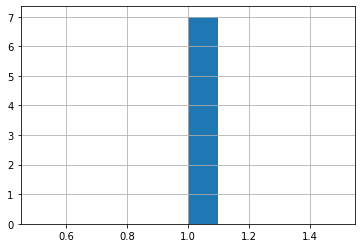

<Figure size 432x288 with 0 Axes>

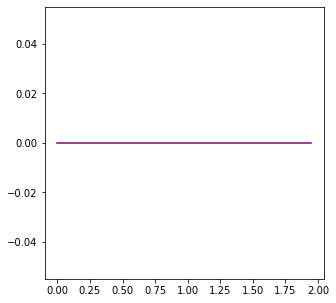

Top 10 bigrams
                   Bigram  Frequency
0        (please, ignore)          1
1         (ignore, prior)          1
2         (prior, tweets)          1
3       (tweets, someone)          1
4   (someone, pretending)          1
5  (pretending, actually)          1 



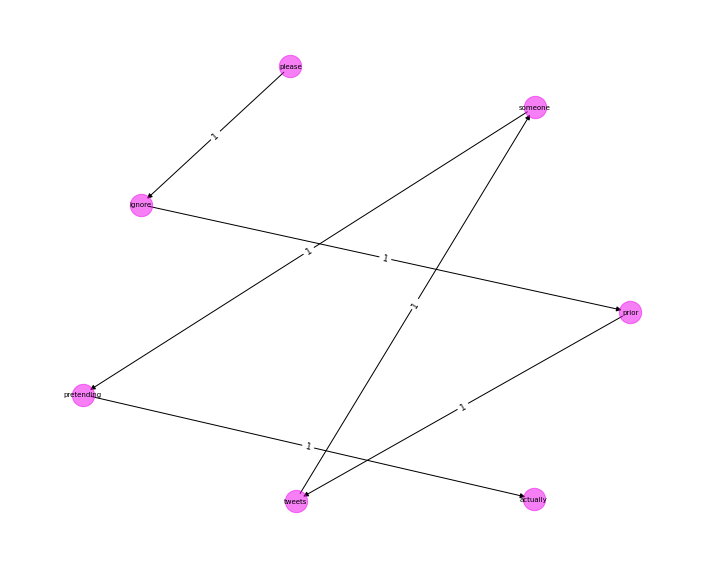





Year:  2011
Top 10 words in the year:  2011
     Word  Frequency
0    many          3
1    true          2
2    ever          2
3    know          2
4    help          2
5  others          2
6     lot          2
7    need          2
8  tweets          2
9   music          2 

Word frequency and Rank table:
      Word  Frequency  Rank
0    many          3     1
1    true          2     2
2    ever          2     3
3    know          2     4
4    help          2     5
5  others          2     6
6     lot          2     7
7    need          2     8
8  tweets          2     9
9   music          2    10 

Histogram of Word Frequency: 

Log-Log plot of Frequency VS Rank to verify Zipf's law: 



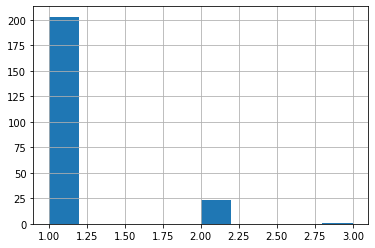

<Figure size 432x288 with 0 Axes>

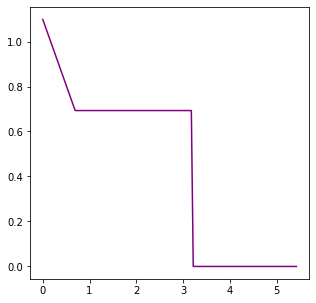

Top 10 bigrams
             Bigram  Frequency
0     (sam, harris)          2
1      (true, ever)          1
2    (ever, wanted)          1
3    (wanted, know)          1
4      (know, real)          1
5     (real, truth)          1
6     (truth, moon)          1
7  (moon, landings)          1
8  (landings, best)          1
9     (best, onion)          1 



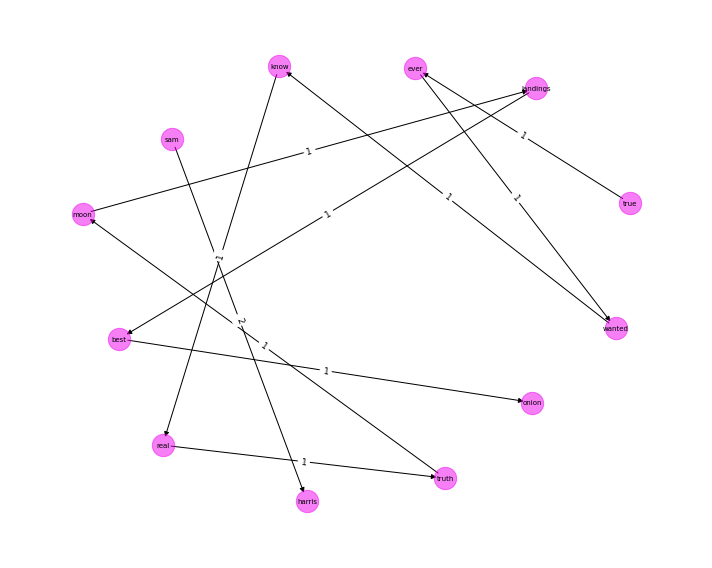





Year:  2012
Top 10 words in the year:  2012
     Word  Frequency
0   model         33
1   tesla         29
2  rocket         26
3   space         22
4  dragon         20
5  spacex         17
6    good         17
7   first         15
8  people         14
9     amp         14 

Word frequency and Rank table:
      Word  Frequency  Rank
0   model         33     1
1   tesla         29     2
2  rocket         26     3
3   space         22     4
4  dragon         20     5
5  spacex         17     6
6    good         17     7
7   first         15     8
8  people         14     9
9     amp         14    10 

Histogram of Word Frequency: 

Log-Log plot of Frequency VS Rank to verify Zipf's law: 



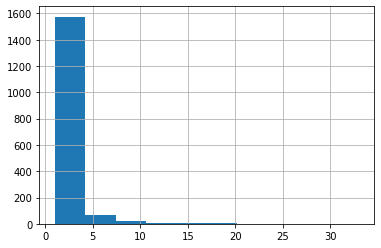

<Figure size 432x288 with 0 Axes>

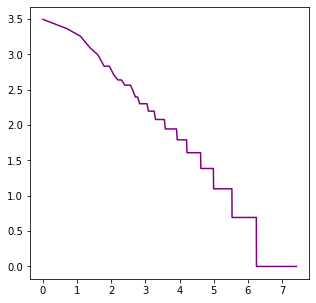

Top 10 bigrams
                   Bigram  Frequency
0        (space, station)         13
1              (model, x)          9
2          (tesla, model)          6
3        (falcon, rocket)          4
4           (first, time)          4
5  (international, space)          3
6          (solar, power)          3
7          (motor, trend)          3
8            (years, ago)          3
9       (cape, canaveral)          3 



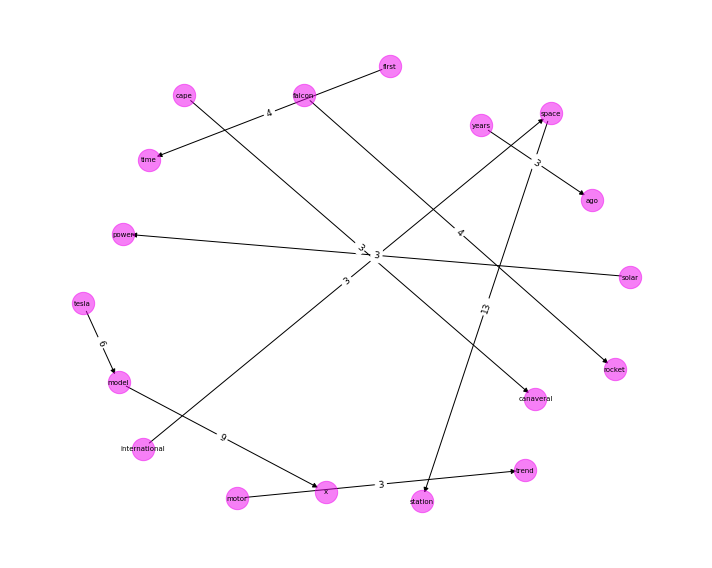





Year:  2013
Top 10 words in the year:  2013
     Word  Frequency
0   tesla         99
1   model         69
2  rocket         60
3     amp         56
4    good         49
5  launch         39
6    like         33
7       w         31
8    time         31
9  dragon         31 

Word frequency and Rank table:
      Word  Frequency  Rank
0   tesla         99     1
1   model         69     2
2  rocket         60     3
3     amp         56     4
4    good         49     5
5  launch         39     6
6    like         33     7
7       w         31     8
8    time         31     9
9  dragon         31    10 

Histogram of Word Frequency: 

Log-Log plot of Frequency VS Rank to verify Zipf's law: 



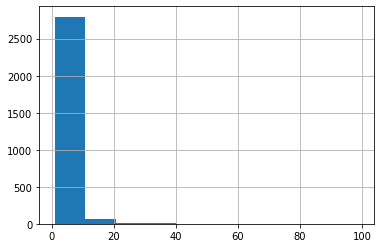

<Figure size 432x288 with 0 Axes>

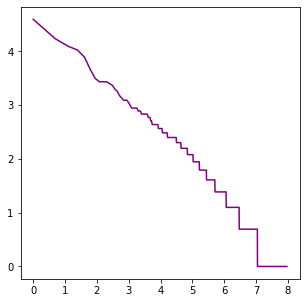

Top 10 bigrams
              Bigram  Frequency
0   (space, station)         16
1     (tesla, model)         14
2  (climate, change)         11
3         (model, x)         10
4     (solar, power)          6
5  (cape, canaveral)          6
6    (direct, sales)          6
7    (battery, pack)          6
8      (first, time)          6
9     (upper, stage)          5 



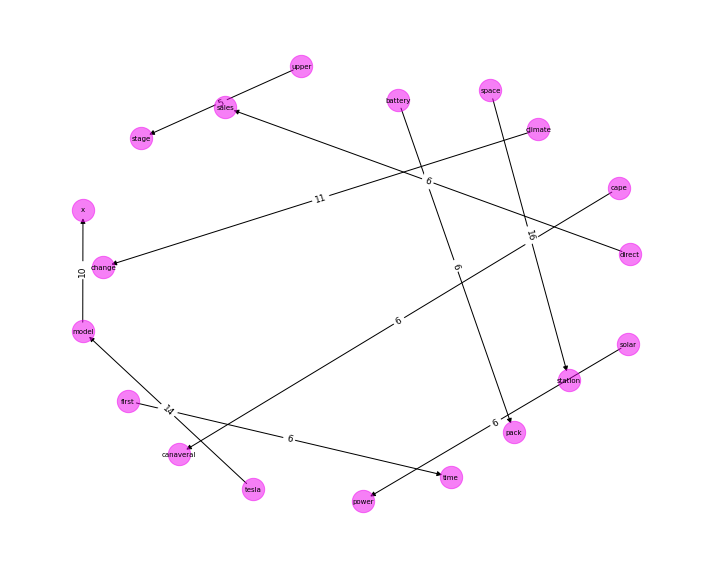





Year:  2014
Top 10 words in the year:  2014
     Word  Frequency
0   tesla        128
1   model         85
2     amp         72
3  rocket         71
4    good         58
5  launch         50
6  dragon         42
7    like         41
8  falcon         39
9       w         38 

Word frequency and Rank table:
      Word  Frequency  Rank
0   tesla        128     1
1   model         85     2
2     amp         72     3
3  rocket         71     4
4    good         58     5
5  launch         50     6
6  dragon         42     7
7    like         41     8
8  falcon         39     9
9       w         38    10 

Histogram of Word Frequency: 

Log-Log plot of Frequency VS Rank to verify Zipf's law: 



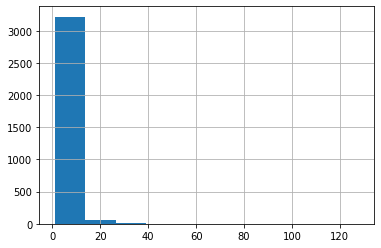

<Figure size 432x288 with 0 Axes>

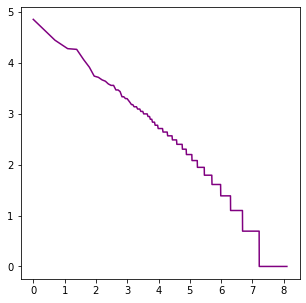

Top 10 bigrams
              Bigram  Frequency
0   (space, station)         19
1     (tesla, model)         16
2  (climate, change)         11
3         (model, x)         10
4    (auto, dealers)          9
5   (falcon, rocket)          7
6     (coming, soon)          7
7  (cape, canaveral)          7
8     (solar, power)          7
9    (direct, sales)          7 



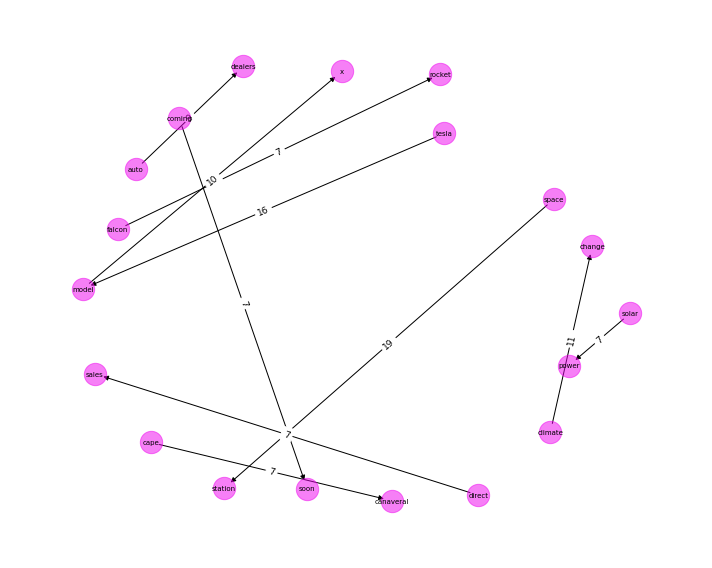





Year:  2015
Top 10 words in the year:  2015
     Word  Frequency
0   tesla        154
1   model        103
2  rocket         96
3     amp         90
4    good         81
5  launch         70
6    like         53
7  dragon         53
8  falcon         52
9    time         50 

Word frequency and Rank table:
      Word  Frequency  Rank
0   tesla        154     1
1   model        103     2
2  rocket         96     3
3     amp         90     4
4    good         81     5
5  launch         70     6
6    like         53     7
7  dragon         53     8
8  falcon         52     9
9    time         50    10 

Histogram of Word Frequency: 

Log-Log plot of Frequency VS Rank to verify Zipf's law: 



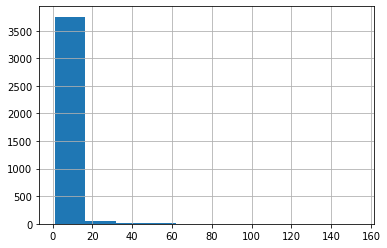

<Figure size 432x288 with 0 Axes>

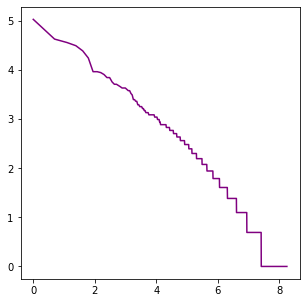

Top 10 bigrams
              Bigram  Frequency
0   (space, station)         23
1     (tesla, model)         19
2  (cape, canaveral)         16
3         (model, x)         14
4  (climate, change)         13
5     (upper, stage)         10
6      (aa, carmack)         10
7     (static, fire)          9
8   (falcon, rocket)          9
9     (solar, power)          9 



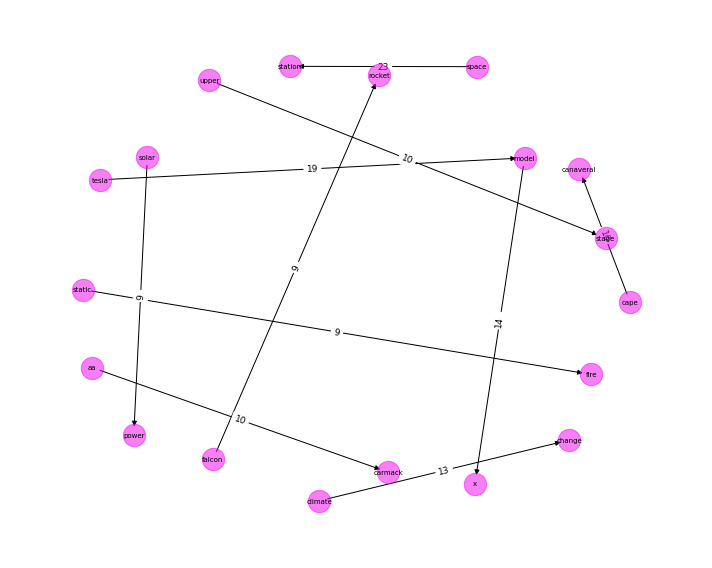





Year:  2016
Top 10 words in the year:  2016
     Word  Frequency
0   tesla        238
1   model        149
2     amp        129
3    good        118
4  rocket        116
5    like         88
6  launch         82
7     yes         77
8    time         69
9  falcon         69 

Word frequency and Rank table:
      Word  Frequency  Rank
0   tesla        238     1
1   model        149     2
2     amp        129     3
3    good        118     4
4  rocket        116     5
5    like         88     6
6  launch         82     7
7     yes         77     8
8    time         69     9
9  falcon         69    10 

Histogram of Word Frequency: 

Log-Log plot of Frequency VS Rank to verify Zipf's law: 



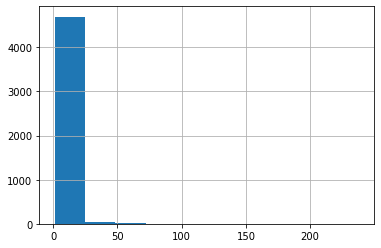

<Figure size 432x288 with 0 Axes>

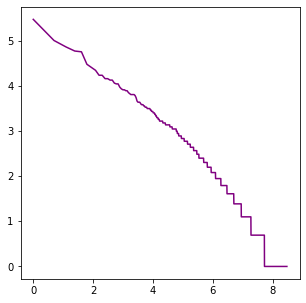

Top 10 bigrams
              Bigram  Frequency
0         (model, x)         25
1   (space, station)         23
2     (tesla, model)         20
3  (cape, canaveral)         19
4  (climate, change)         16
5      (looks, like)         14
6      (aa, carmack)         14
7     (upper, stage)         13
8       (next, week)         12
9     (coming, soon)         12 



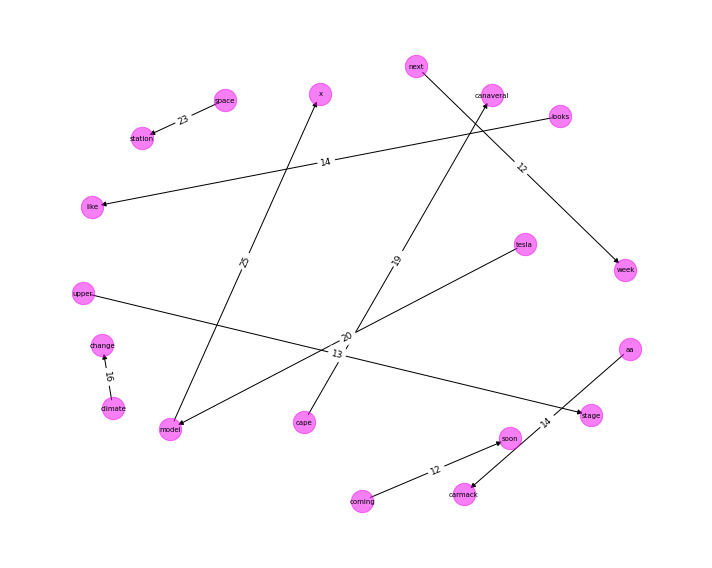





Year:  2017
Top 10 words in the year:  2017
     Word  Frequency
0   tesla        312
1     amp        219
2   model        208
3    good        171
4  rocket        149
5    like        137
6     yes        132
7  launch        112
8    next        103
9   would        100 

Word frequency and Rank table:
      Word  Frequency  Rank
0   tesla        312     1
1     amp        219     2
2   model        208     3
3    good        171     4
4  rocket        149     5
5    like        137     6
6     yes        132     7
7  launch        112     8
8    next        103     9
9   would        100    10 

Histogram of Word Frequency: 

Log-Log plot of Frequency VS Rank to verify Zipf's law: 



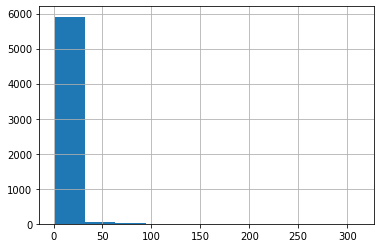

<Figure size 432x288 with 0 Axes>

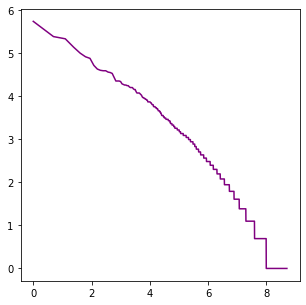

Top 10 bigrams
              Bigram  Frequency
0         (model, x)         34
1     (coming, soon)         27
2   (space, station)         25
3    (falcon, heavy)         22
4     (tesla, model)         22
5       (next, week)         21
6  (cape, canaveral)         21
7      (looks, like)         20
8     (upper, stage)         19
9  (climate, change)         19 



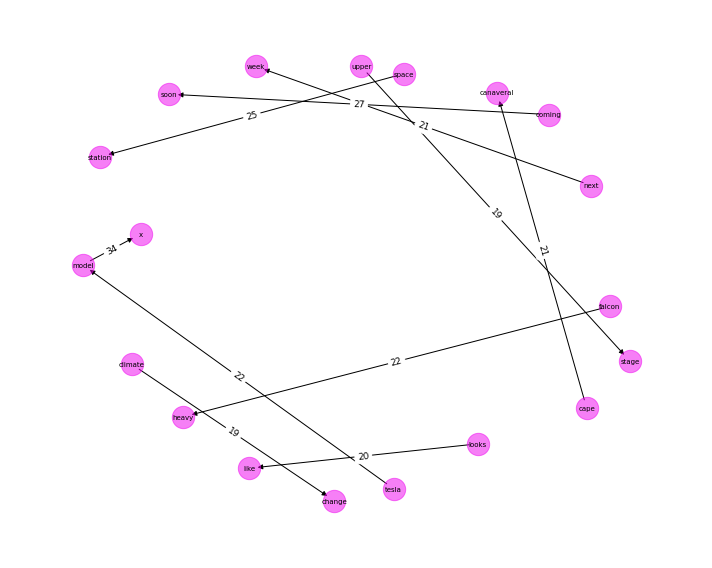





Year:  2018
Top 10 words in the year:  2018
     Word  Frequency
0     amp        527
1   tesla        291
2     car        121
3     yes        108
4    good        102
5   model         98
6    like         95
7   would         77
8  people         74
9    even         65 

Word frequency and Rank table:
      Word  Frequency  Rank
0     amp        527     1
1   tesla        291     2
2     car        121     3
3     yes        108     4
4    good        102     5
5   model         98     6
6    like         95     7
7   would         77     8
8  people         74     9
9    even         65    10 

Histogram of Word Frequency: 

Log-Log plot of Frequency VS Rank to verify Zipf's law: 



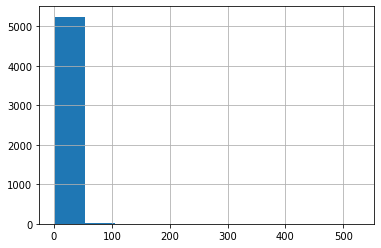

<Figure size 432x288 with 0 Axes>

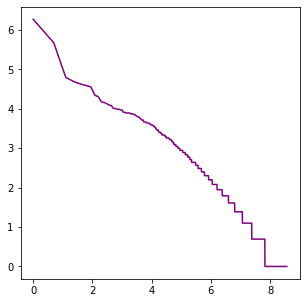

Top 10 bigrams
                 Bigram  Frequency
0          (next, year)         25
1        (coming, soon)         22
2     (boring, company)         16
3       (falcon, heavy)         14
4         (tesla, team)         11
5          (good, idea)         11
6         (dual, motor)         11
7         (test, drive)         10
8           (end, next)         10
9  (model, performance)         10 



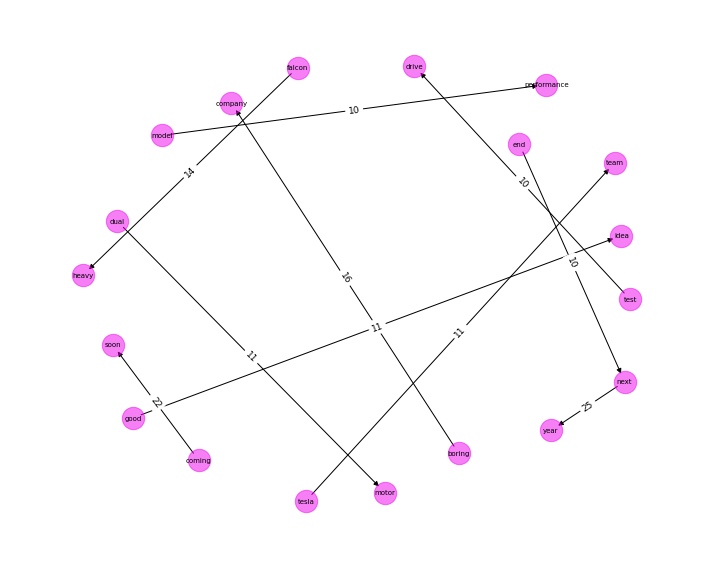





Year:  2019
Top 10 words in the year:  2019
    Word  Frequency
0    amp       1218
1  tesla        853
2    yes        393
3  model        373
4   good        358
5   like        315
6    car        287
7  would        275
8  great        243
9   time        224 

Word frequency and Rank table:
     Word  Frequency  Rank
0    amp       1218     1
1  tesla        853     2
2    yes        393     3
3  model        373     4
4   good        358     5
5   like        315     6
6    car        287     7
7  would        275     8
8  great        243     9
9   time        224    10 

Histogram of Word Frequency: 

Log-Log plot of Frequency VS Rank to verify Zipf's law: 



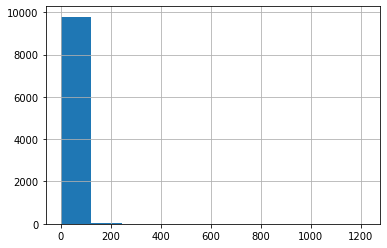

<Figure size 432x288 with 0 Axes>

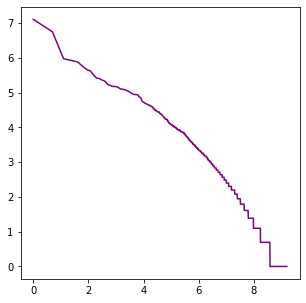

Top 10 bigrams
              Bigram  Frequency
0     (coming, soon)         69
1       (next, year)         53
2    (falcon, heavy)         45
3       (next, week)         44
4         (model, x)         43
5    (self, driving)         37
6  (boring, company)         34
7      (good, point)         31
8   (space, station)         31
9      (looks, like)         31 



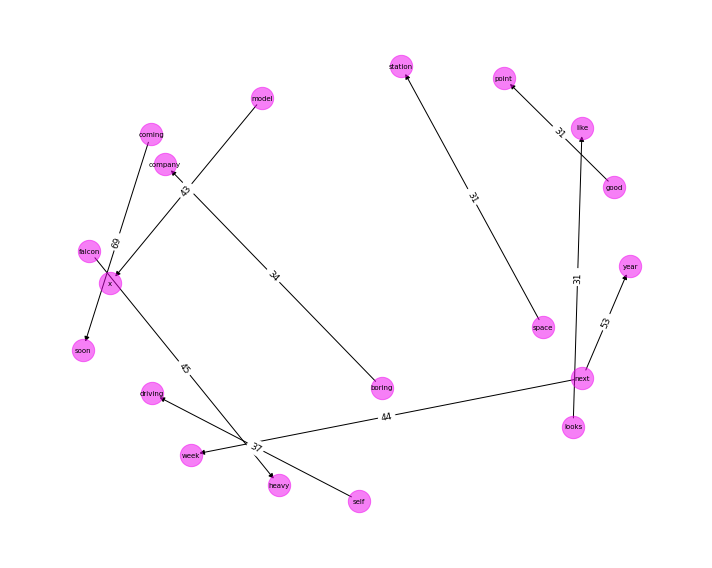





Year:  2020
Top 10 words in the year:  2020
    Word  Frequency
0    amp       1822
1  tesla       1060
2    yes        554
3   good        471
4  model        404
5   like        395
6  great        372
7  would        371
8    car        329
9   much        310 

Word frequency and Rank table:
     Word  Frequency  Rank
0    amp       1822     1
1  tesla       1060     2
2    yes        554     3
3   good        471     4
4  model        404     5
5   like        395     6
6  great        372     7
7  would        371     8
8    car        329     9
9   much        310    10 

Histogram of Word Frequency: 

Log-Log plot of Frequency VS Rank to verify Zipf's law: 



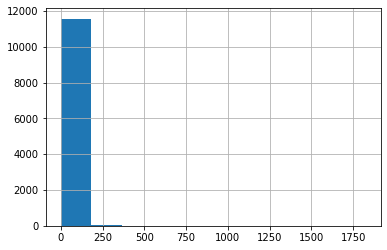

<Figure size 432x288 with 0 Axes>

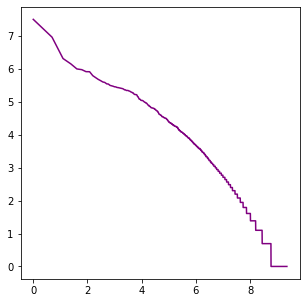

Top 10 bigrams
            Bigram  Frequency
0   (coming, soon)         88
1     (next, year)         60
2     (next, week)         54
3   (pretty, much)         50
4    (aa, carmack)         50
5  (falcon, heavy)         48
6  (self, driving)         47
7       (model, x)         43
8    (good, point)         42
9    (looks, like)         39 



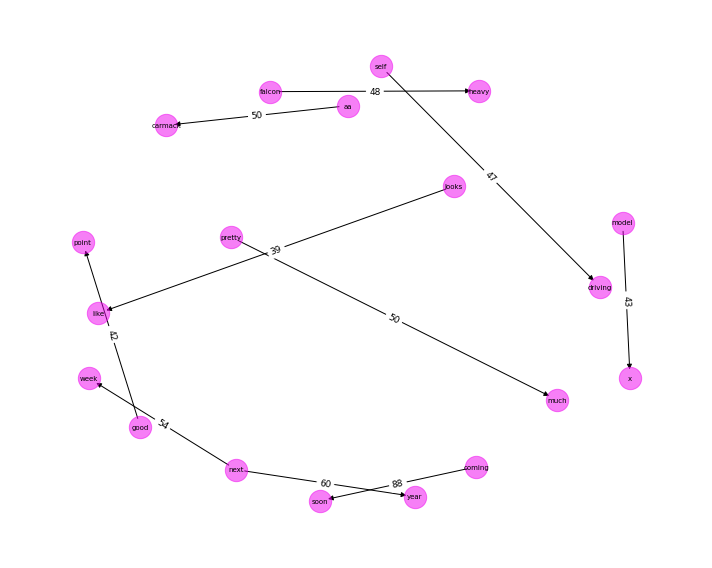





Year:  2021
Top 10 words in the year:  2021
    Word  Frequency
0    amp        476
1  tesla        237
2  great        102
3   good         98
4   much         93
5   haha         89
6   like         89
7  would         89
8   time         86
9   beta         77 

Word frequency and Rank table:
     Word  Frequency  Rank
0    amp        476     1
1  tesla        237     2
2  great        102     3
3   good         98     4
4   much         93     5
5   haha         89     6
6   like         89     7
7  would         89     8
8   time         86     9
9   beta         77    10 

Histogram of Word Frequency: 

Log-Log plot of Frequency VS Rank to verify Zipf's law: 



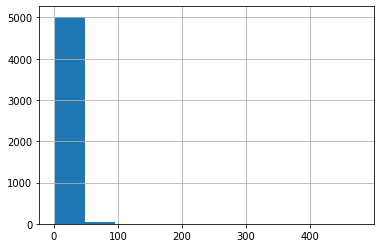

<Figure size 432x288 with 0 Axes>

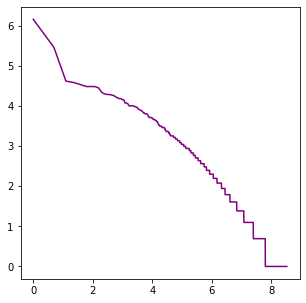

Top 10 bigrams
                   Bigram  Frequency
0             (fsd, beta)         21
1            (long, term)         19
2          (pure, vision)         16
3  (life, multiplanetary)         16
4         (self, driving)         16
5            (next, week)         15
6            (next, year)         14
7          (super, heavy)         13
8          (pretty, much)         13
9         (supply, chain)         13 



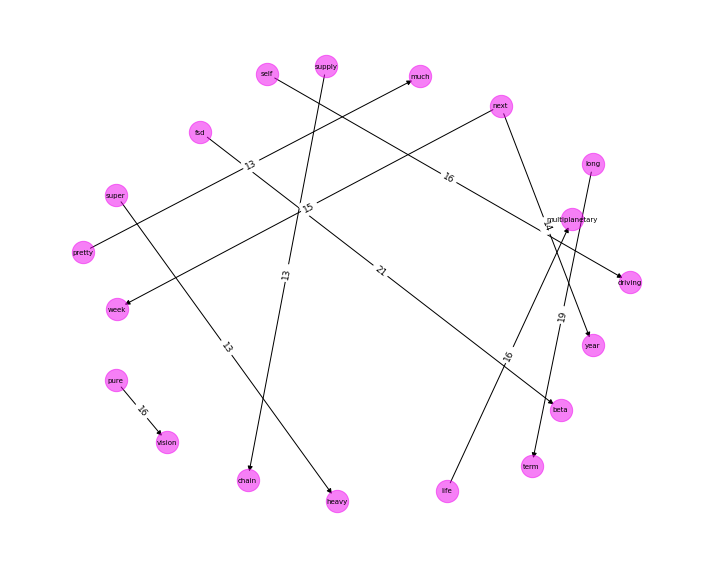





Year:  2022
Top 10 words in the year:  2022
       Word  Frequency
0       amp         80
1     tesla         68
2    people         34
3     would         32
4       yes         32
5       one         30
6  starlink         28
7      good         28
8       car         26
9    enough         26 

Word frequency and Rank table:
        Word  Frequency  Rank
0       amp         80     1
1     tesla         68     2
2    people         34     3
3     would         32     4
4       yes         32     5
5       one         30     6
6  starlink         28     7
7      good         28     8
8       car         26     9
9    enough         26    10 

Histogram of Word Frequency: 

Log-Log plot of Frequency VS Rank to verify Zipf's law: 



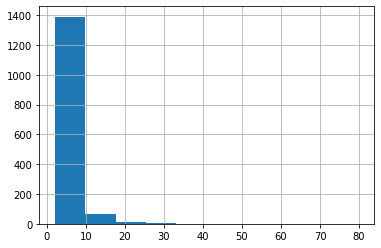

<Figure size 432x288 with 0 Axes>

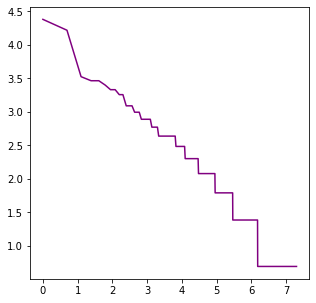

Top 10 bigrams
                   Bigram  Frequency
0           (birth, rate)          8
1           (aa, carmack)          8
2   (sustainable, energy)          6
3           (work, tesla)          6
4         (self, driving)          6
5          (neural, nets)          6
6            (last, year)          6
7  (life, multiplanetary)          6
8   (starlink, terminals)          4
9         (news, sources)          4 



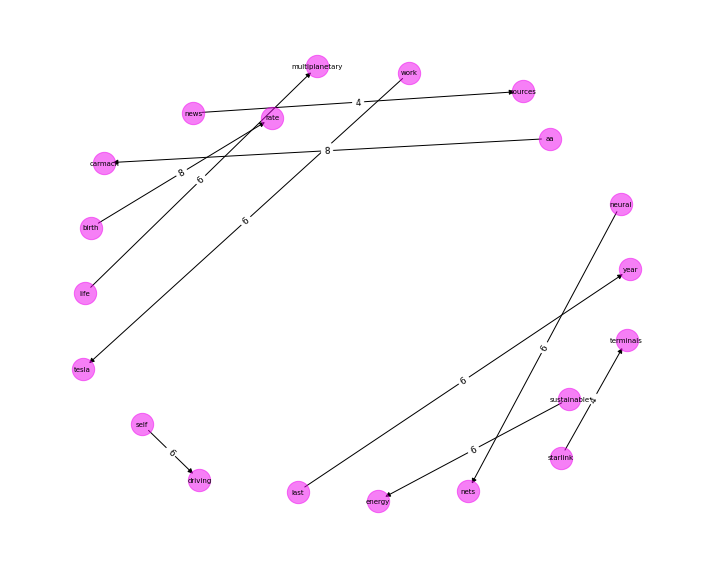

In [ ]:
for year in yearsfolder:
  print('Year: ', str(year))
  df = pd.read_csv(str(year) + '.csv')
  df_tweets = df['tweet'].to_frame()

  #preprocessing tweets
  i=0
  for tweet in df_tweets['tweet']:
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", tweet).split()) #removing mentions and hashtags
    tweet = ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split()) #removing URLs
    tweet = ' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", tweet).split()) #removing punctuations
    tweet = tweet.lower() #converting to lower case
    df_tweets.loc[i,'clean_tweet'] = tweet
    i=i+1

  df_tweets['clean_tweet'] = df_tweets['clean_tweet'].str.replace('[^a-z]', ' ', flags=re.UNICODE, regex=True) #removing emojis and special characters
  
  #removing stopwords
  stop = stopwords.words('english')
  df_tweets['clean_tweet'] = df_tweets['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
  
  #tokenizing words
  tweetlist = df_tweets['clean_tweet'].str.cat(sep=' ')
  words = nltk.tokenize.word_tokenize(tweetlist)
  word_dist = nltk.FreqDist(words)

  #top 10 words with highest frequency
  top10_freq_words = pd.DataFrame(word_dist.most_common(10),
                      columns=['Word', 'Frequency'])
  print("Top 10 words in the year: ", str(year))
  print(top10_freq_words, "\n")

#creating word frequency and rank table for Zipf Law
  freq_and_rank_df = pd.DataFrame(word_dist.most_common(word_dist.B()),
                      columns=['Word', 'Frequency'])
  rank = list(range(1, word_dist.B()+1))
  freq_and_rank_df['Rank'] = rank

  #creating histogram of the frequency distribution
  freq_and_rank_df['Frequency'].hist()

  #printing first 10 rows of freq and rank table
  print("Word frequency and Rank table:\n", freq_and_rank_df.head(10),"\n")

  #plotting histogram of the frequency distribution
  print("Histogram of Word Frequency: \n")
  fig = plt.figure()   # Initializes current figure
  fig = plt.figure(figsize=(5,5))

  #plotting log log plot to verify Zipf's law
  print("Log-Log plot of Frequency VS Rank to verify Zipf's law: \n")
  x = np.log(freq_and_rank_df['Rank'])
  y = np.log(freq_and_rank_df['Frequency'])
  plt.plot(x, y, color='purple')
  plt.show()
  fig.show()

  #creating bigrams
  tokens = nltk.word_tokenize(tweetlist)
  bigrams = nltk.bigrams(tokens)
  bigram_dist = nltk.FreqDist(bigrams)
  print("Top 10 bigrams")
  bigram_df = pd.DataFrame(bigram_dist.most_common(10),
                      columns=['Bigram', 'Frequency'])
  print(bigram_df, "\n")

  d = bigram_df.set_index('Bigram').T.to_dict('records')
  # Create network plot 
  
  G = nx.DiGraph()
  # Create connections between nodes
  for k, v in d[0].items():
      G.add_edge(k[0], k[1], weight=(v))

  fig, ax = plt.subplots(figsize=(10, 8))
  pos = nx.spring_layout(G, k=5)

  # nodes
  nx.draw_networkx_nodes(G, pos, node_size=500, node_color='#ee00ee80')
  # edges
  nx.draw_networkx_edges(G, pos, width=1, arrows=True)
  #edge lables
  edge_labels = nx.get_edge_attributes(G, "weight")
  for k,v in edge_labels.items():
    edge_labels[k]=int(v)
  nx.draw_networkx_edge_labels(G, pos, edge_labels,font_size=9, font_family="sans-serif" )
  # node labels
  nx.draw_networkx_labels(G, pos, font_size=7, font_family="sans-serif")
  ax = plt.gca()
  ax.margins(0.08)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
  print("\n\n\n")